# Mục Đích
> Trong phần này chúng ta sẽ xây dựng một model CNN từ đầu và cùng visualize kết quả của từng layer để có thể hiểu hơn được cách thức hoạt động của CNN. Một vài kiến thức sẽ được sử dụng lồng ghép với kiến thức trong Deeplearning.AI: Convolutional Neural Networks in TensorFlow.

In [ ]:
#default_exp image.cnn_model

In [ ]:
#hide
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu

In [ ]:
#export
path = '/home/ddpham/git/TFExam/data/sw/'

In [ ]:
#hide
!ls {path}

In [ ]:
#export
bs = 16
train_ds = preprocessing.image_dataset_from_directory(
    directory=f'{path}/train'
    , labels='inferred'
    , label_mode='binary'
    , batch_size=bs
    , image_size=(300, 300)
)
valid_ds = preprocessing.image_dataset_from_directory(
    directory=f'{path}/test'
    , labels='inferred'
    , label_mode='binary'
    , batch_size=bs
    , image_size=(300, 300)
)

Found 99 files belonging to 2 classes.
Found 43 files belonging to 2 classes.


In [ ]:
#hide
!nvidia-smi

Fri Jul 16 05:48:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 471.11       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 38%   45C    P2    43W / 180W |   7608MiB /  8192MiB |    ERR!      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Tạo CNN cơ bản
> cấu trúc này được sử dụng lại từ khóa học: Convolutional Neural Networks in Tensorflow

In [ ]:
#export
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, activation='relu', input_shape=(300, 300, 3)) # filters=16, kernel size=3
    , keras.layers.MaxPooling2D(2, 2) # pooling size=2, strides=2
    , keras.layers.Conv2D(32, 3, activation='relu')
    , keras.layers.MaxPooling2D(2, 2)
    , keras.layers.Conv2D(64, 3, activation='relu')
    , keras.layers.MaxPooling2D(2, 2)
    , keras.layers.Conv2D(64, 3, activation='relu')
    , keras.layers.MaxPooling2D(2, 2)
    , keras.layers.Conv2D(64, 3, activation='relu')
    , keras.layers.MaxPooling2D(2, 2)
    , keras.layers.Flatten()
    , keras.layers.Dense(512, activation='relu')
    , keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#export
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
#export
optimizer = keras.optimizers.Adam(learning_rate=3e-4)
loss_func = keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

In [ ]:
#export
epochs=10
model.fit(train_ds, epochs=epochs, validation_data=valid_ds)

Epoch 1/10
7/7 [==============================] - 1s 94ms/step - loss: 0.4851 - accuracy: 0.8713 - val_loss: 0.8469 - val_accuracy: 0.6744
Epoch 2/10
7/7 [==============================] - 1s 63ms/step - loss: 0.1843 - accuracy: 0.9490 - val_loss: 1.0744 - val_accuracy: 0.6977
Epoch 3/10
7/7 [==============================] - 1s 64ms/step - loss: 0.1346 - accuracy: 0.9513 - val_loss: 1.1511 - val_accuracy: 0.6977
Epoch 4/10
7/7 [==============================] - 1s 66ms/step - loss: 0.0323 - accuracy: 0.9962 - val_loss: 1.6817 - val_accuracy: 0.6279
Epoch 5/10
7/7 [==============================] - 1s 65ms/step - loss: 0.0962 - accuracy: 0.9490 - val_loss: 1.5716 - val_accuracy: 0.7442
Epoch 6/10
7/7 [==============================] - 1s 65ms/step - loss: 0.0249 - accuracy: 0.9853 - val_loss: 1.6680 - val_accuracy: 0.6977
Epoch 7/10
7/7 [==============================] - 1s 64ms/step - loss: 0.0189 - accuracy: 0.9962 - val_loss: 1.5685 - val_accuracy: 0.7442
Epoch 8/10
7/7 [===========

# Visualize các layers trong CNN
> Chúng ta muốn biết xem từng layers trong CNN thực sự đã làm gì với hình ảnh bằng cách visualize kết quả đầu ra của từng layer để hiểu được.

In [ ]:
#export
# Chúng ta có 10 layers trong model trên cần xem kết quả đầu ra:
visualized_outputs = [layer.output for layer in model.layers[1:10]]

In [ ]:
#export
# Lấy tên cho từng layer để tạo title ảnh:
layer_names = [layer.name for layer in model.layers[1:10]]
layer_names

['max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4']

In [ ]:
#export
# Tạo model để lấy kết quả visualize:
visualized_model = keras.Model(inputs=model.input, outputs=visualized_outputs)

In [ ]:
#export
visualized_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0     

In [ ]:
#export
# Tạo function lấy dữ liệu sample:
def get_sample_image(valid_ds):
    i = 0
    for image, lable in valid_ds.take(1):
        j = np.random.randint(0, 16)
        sample_image = image[j]
        i +=1
        if i > 1: break
    return tf.expand_dims(sample_image, axis=0)

In [ ]:
#export
# Lấy sample dữ liệu
sample_image = get_sample_image(valid_ds)

In [ ]:
#export
# Tạo dữ liệu cho các layers:
feature_maps = visualized_model.predict(sample_image)

In [ ]:
#hide
len(feature_maps), feature_maps[0].shape

(9, (1, 149, 149, 16))

<ipython-input-21-5fc498c5d678>:9: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


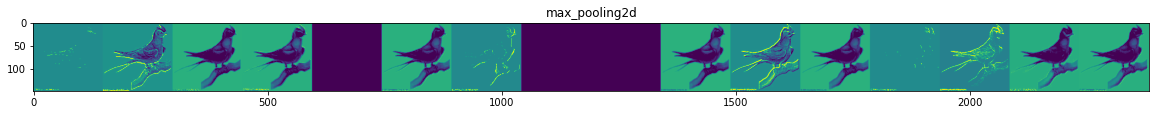

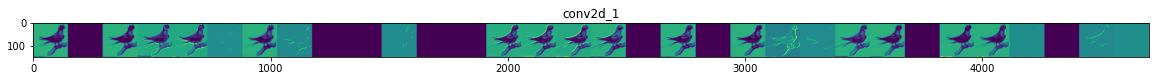

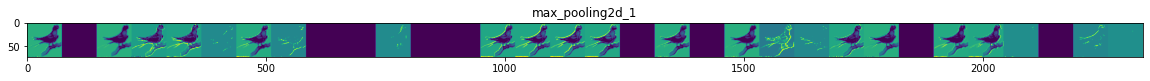

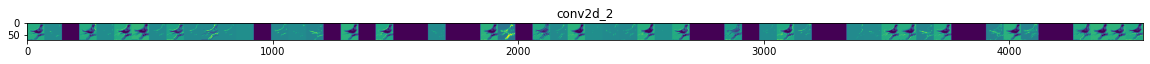

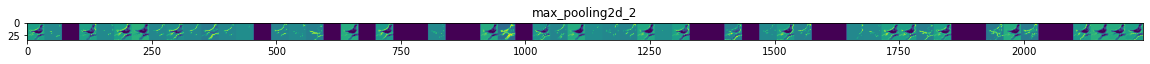

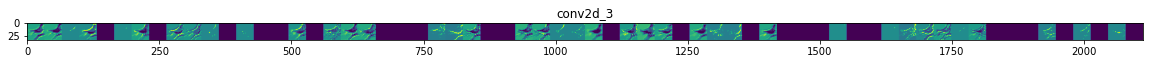

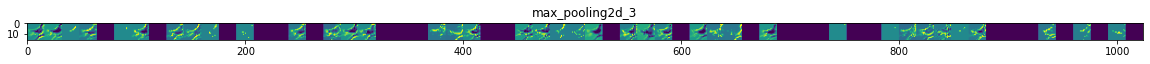

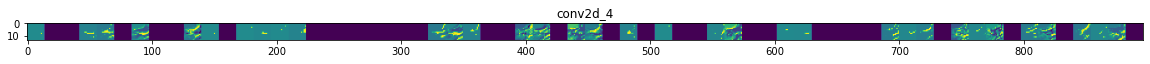

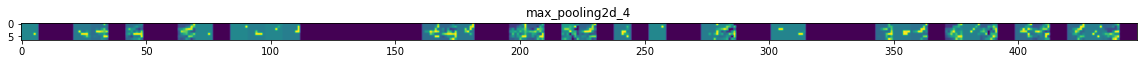

In [ ]:
#export
for i, name, feature in zip(range(len(layer_names)), layer_names, feature_maps):
    n_features = feature.shape[-1]
    size = feature.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x = feature[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size: (i+1) * size] = x
    scale = 20./ n_features
    plt.figure(figsize=(scale * n_features, scale))
#     plt.figure(figsize=(30, 1))
    plt.title(name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

__Lưu ý:__
Code được copy từ khóa học: Deep learning, AI - TensorFlow Developer Professional Certificate

# Visualize với pretrained model

## Tạo dữ liệu

In [ ]:
#export
bs = 16
train_ds = preprocessing.image_dataset_from_directory(
    directory=f'{path}/train'
    , labels='inferred'
    , label_mode='binary'
    , batch_size=bs
    , image_size=(460, 460)
)
valid_ds = preprocessing.image_dataset_from_directory(
    directory=f'{path}/test'
    , labels='inferred'
    , label_mode='binary'
    , batch_size=bs
    , image_size=(460, 460)
)

Found 99 files belonging to 2 classes.
Found 43 files belonging to 2 classes.


## Tạo biến đổi dữ liệu

In [ ]:
#export
preprocessing_layer = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomCrop(224, 224)
    , keras.layers.experimental.preprocessing.RandomFlip('vertical')
])

In [ ]:
#export
def preprocessing_image(x, y):
    x = preprocessing_layer(x, training=True)
    x = keras.applications.resnet50.preprocess_input(x)
    return (x, y)

In [ ]:
#export
train_ds = train_ds.map(preprocessing_image)
valid_ds = valid_ds.map(preprocessing_image)

## Tạo model

In [ ]:
#export
resnet = keras.applications.resnet50.ResNet50(include_top=False, input_shape=(224, 224, 3))
for layer in resnet.layers:
    layer.trainable=False

In [ ]:
#export
flatten = keras.layers.Flatten(name='flatten')(resnet.output)
prediction = keras.layers.Dense(1, activation='sigmoid', name='prediction')(flatten)

In [ ]:
#export
keras.backend.clear_session()
model = keras.Model(inputs=resnet.input, outputs=prediction)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#export
model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
7/7 [==============================] - 45s 5s/step - loss: 1.5066 - accuracy: 0.6165 - precision: 0.5241 - recall: 0.4752 - val_loss: 2.0436 - val_accuracy: 0.6279 - val_precision: 0.5714 - val_recall: 0.8000
Epoch 2/10
7/7 [==============================] - 2s 237ms/step - loss: 1.8065 - accuracy: 0.6894 - precision: 0.6337 - recall: 0.8313 - val_loss: 1.2521 - val_accuracy: 0.8140 - val_precision: 0.8750 - val_recall: 0.7000
Epoch 3/10
7/7 [==============================] - 2s 225ms/step - loss: 0.5562 - accuracy: 0.8264 - precision: 0.8031 - recall: 0.7739 - val_loss: 1.5102 - val_accuracy: 0.7674 - val_precision: 0.8125 - val_recall: 0.6500
Epoch 4/10
7/7 [==============================] - 2s 197ms/step - loss: 0.7460 - accuracy: 0.8906 - precision: 0.8893 - recall: 0.8921 - val_loss: 1.5521 - val_accuracy: 0.6744 - val_precision: 0.6250 - val_recall: 0.7500
Epoch 5/10
7/7 [==============================] - 2s 197ms/step - loss: 0.5800 - accuracy: 0.9147 - precision: 0.9

## Visualize cho một vài layer

In [ ]:
#export
# Chọn 5 layers làm ví dụ:
model_sample = []
model_names = []
for i in range(15):
    model_sample.append(model.layers[i].output)
    model_names.append(model.layers[i].name)
model_sample = keras.Model(inputs=model.input, outputs=model_sample)
model_sample.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

<ipython-input-33-93a0ba240d57>:11: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


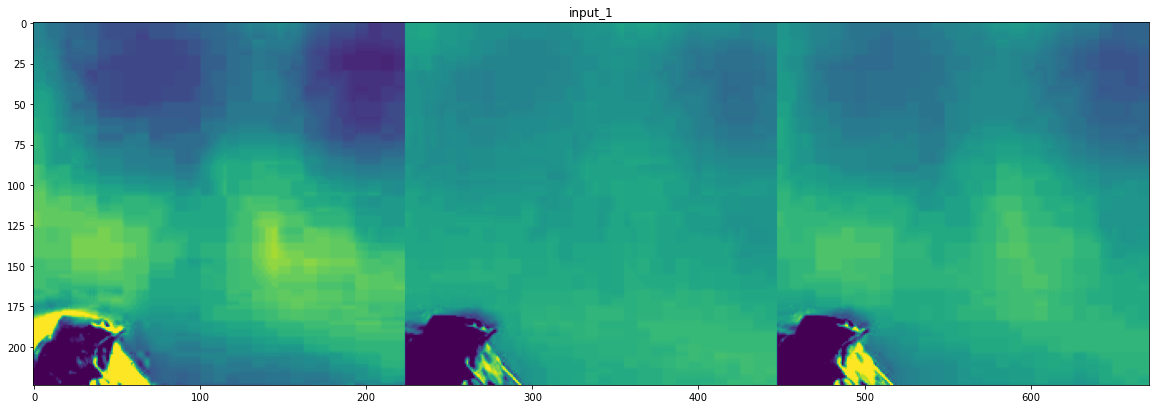

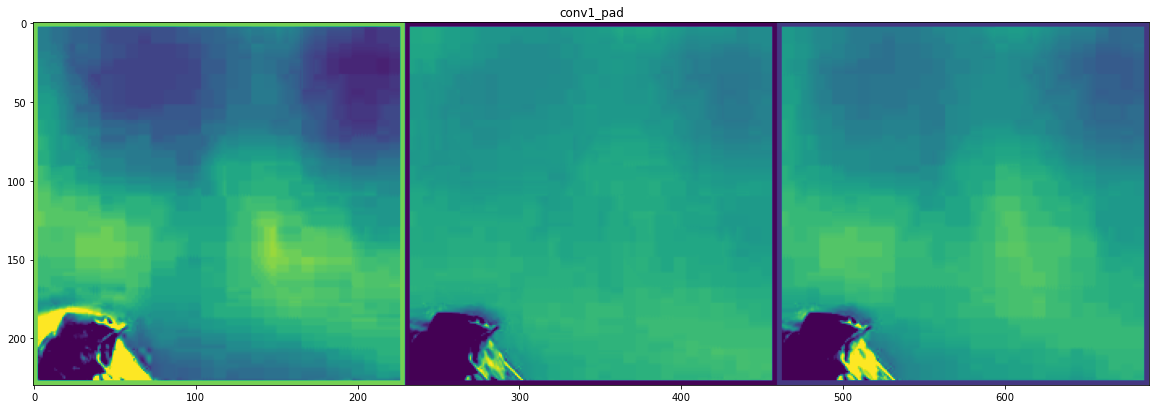

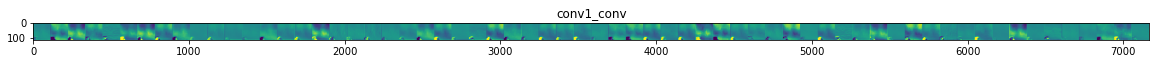

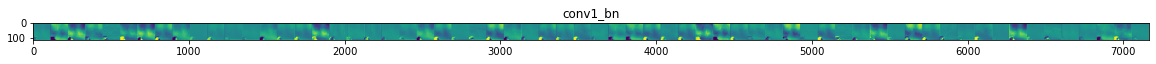

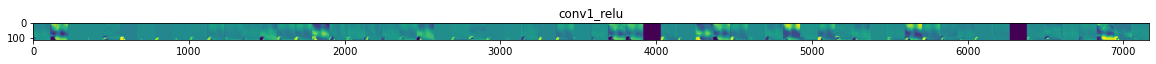

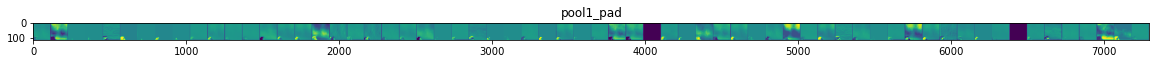

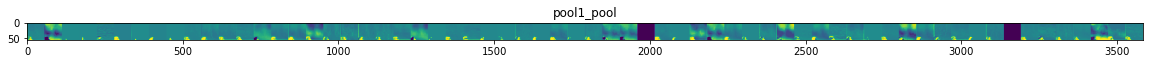

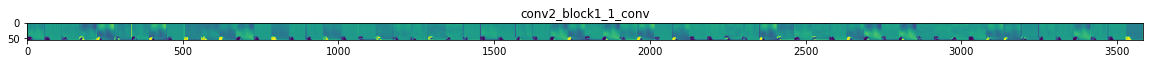

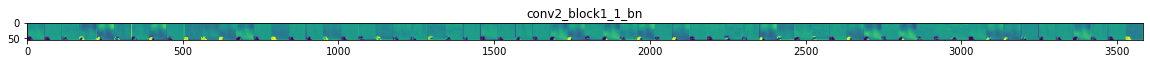

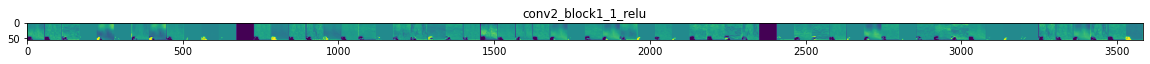

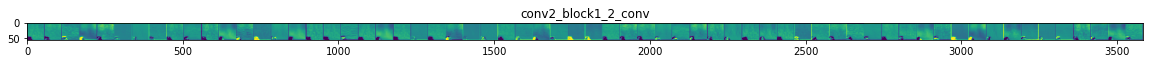

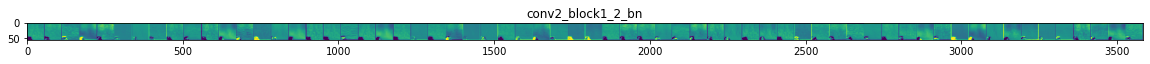

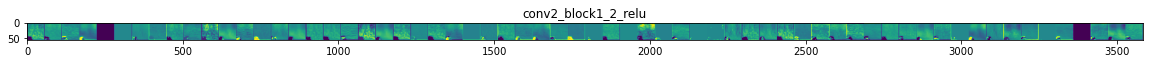

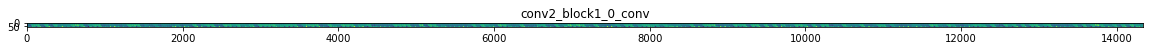

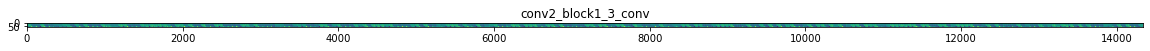

In [ ]:
#export
sample_image = get_sample_image(train_ds)
sample_features = model_sample.predict(sample_image)
for name, feature in zip(model_names, sample_features):
    n_features = feature.shape[-1]
    size = feature.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x = feature[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size: (i+1) * size] = x
    scale = 20./ n_features
    plt.figure(figsize=(scale * n_features, scale))
#     plt.figure(figsize=(30, 1))
    plt.title(name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

<ipython-input-34-f3eabfd67893>:11: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


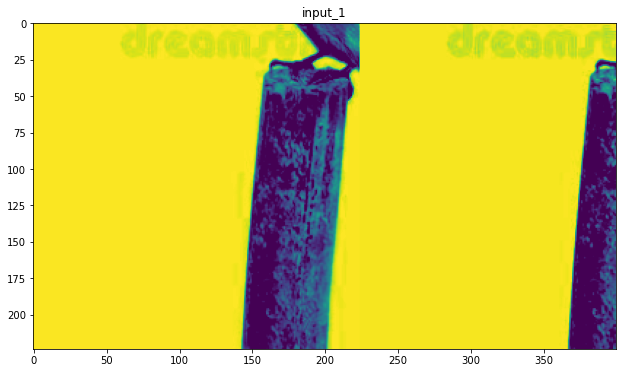

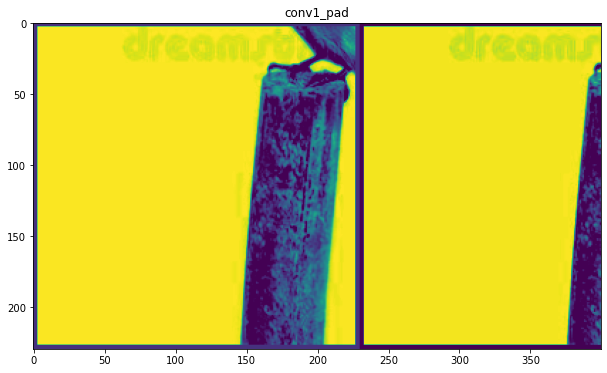

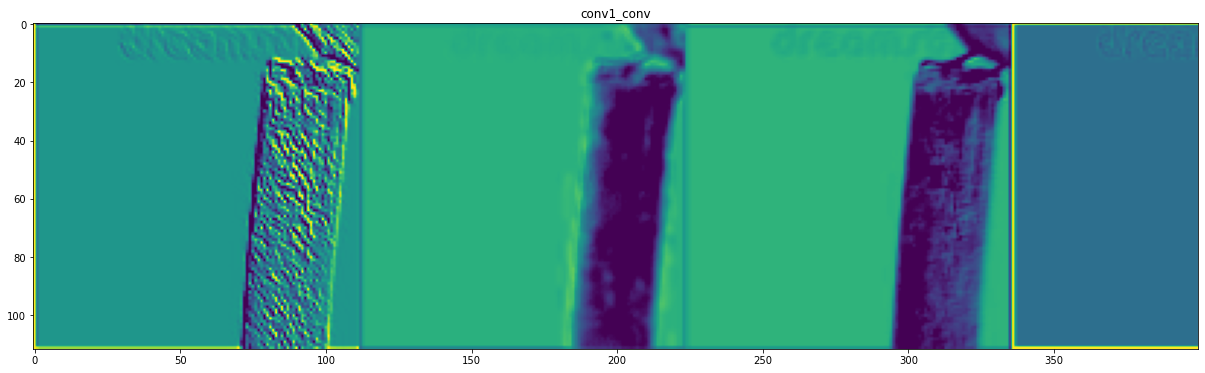

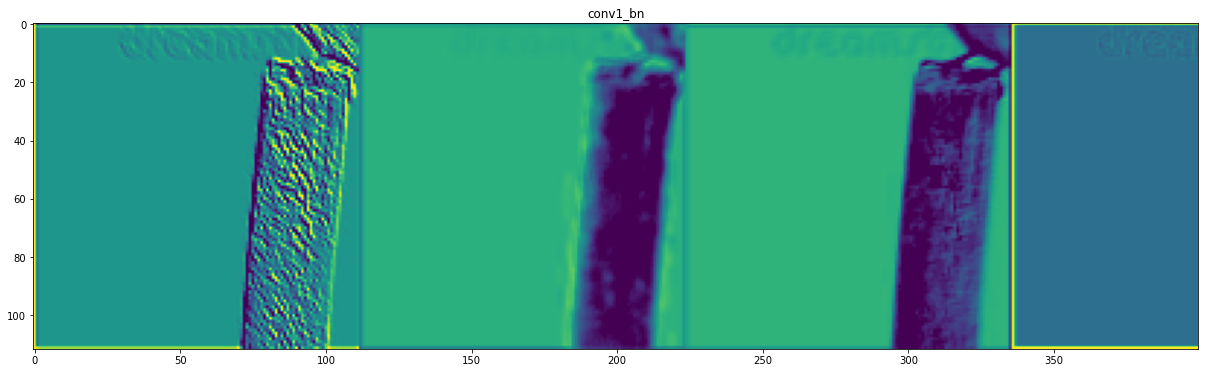

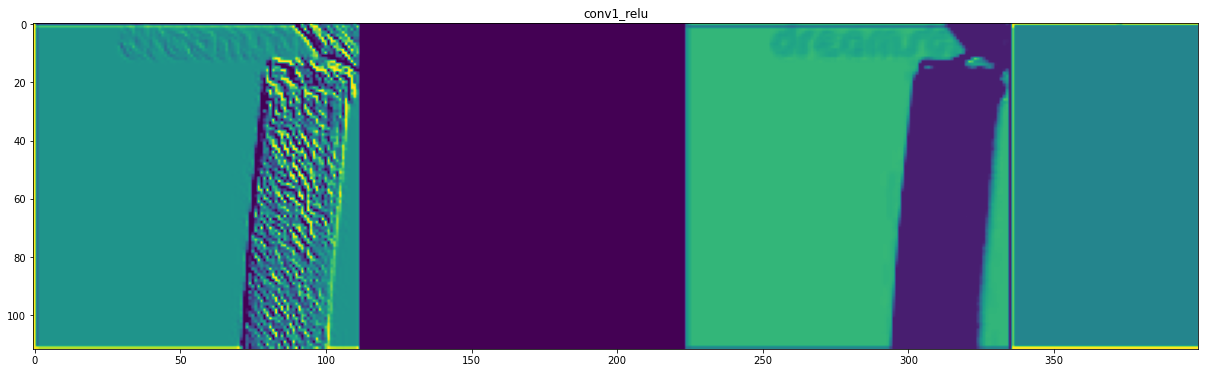

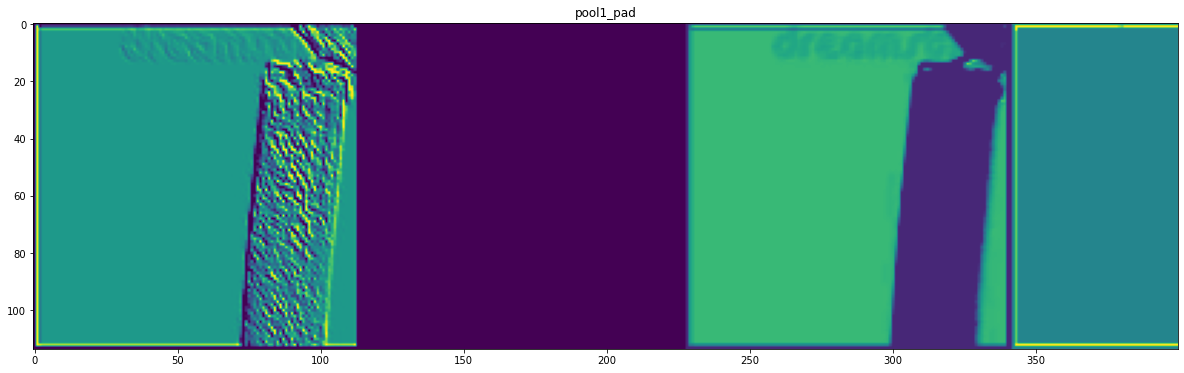

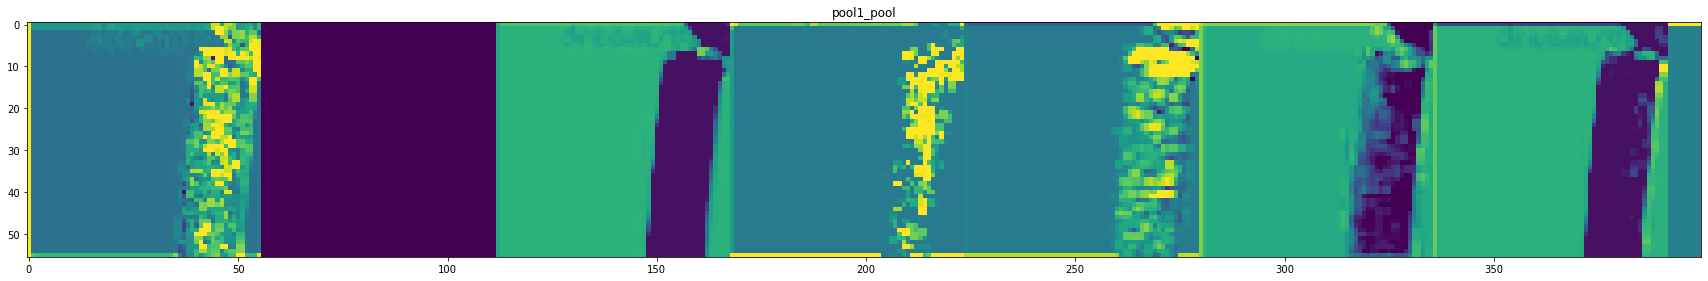

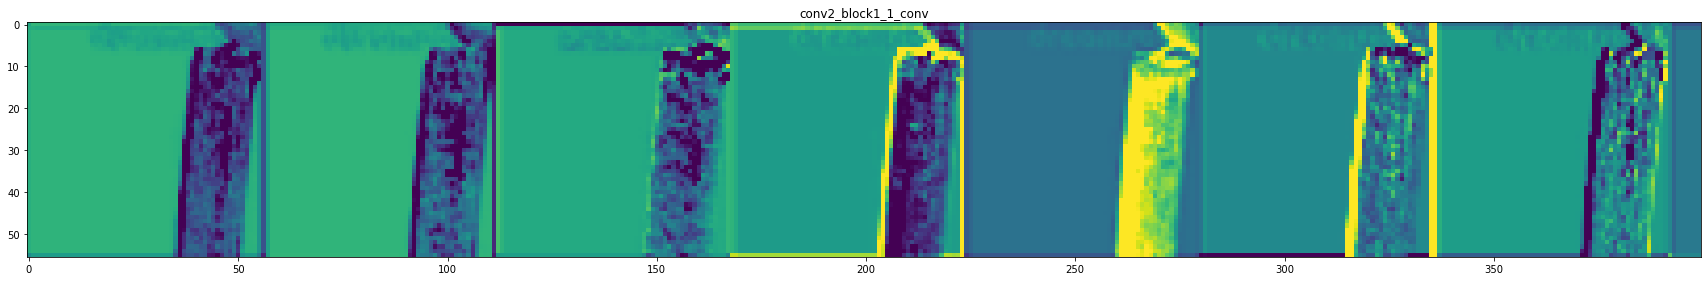

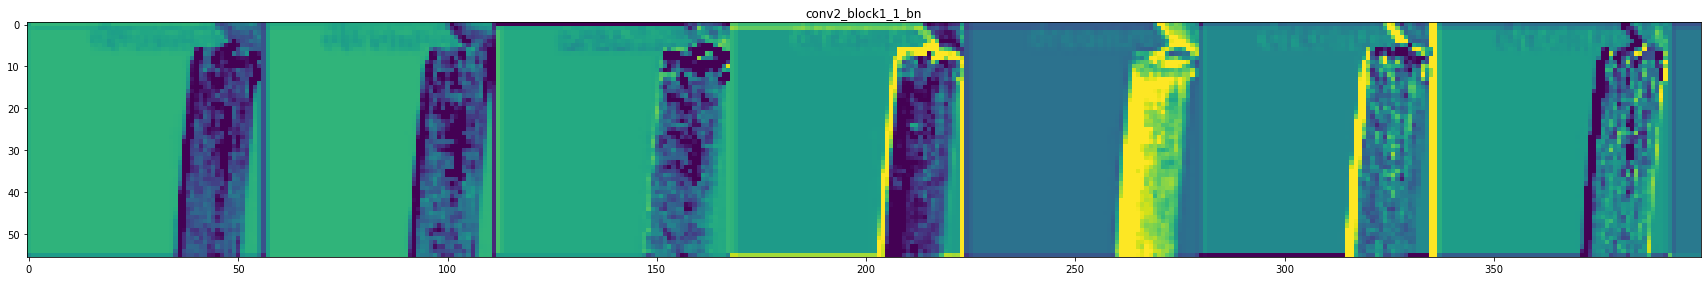

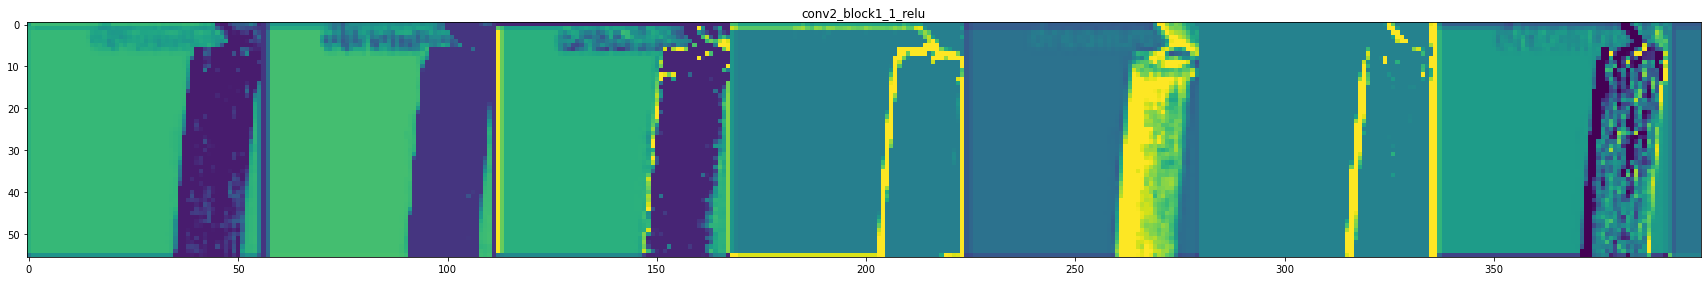

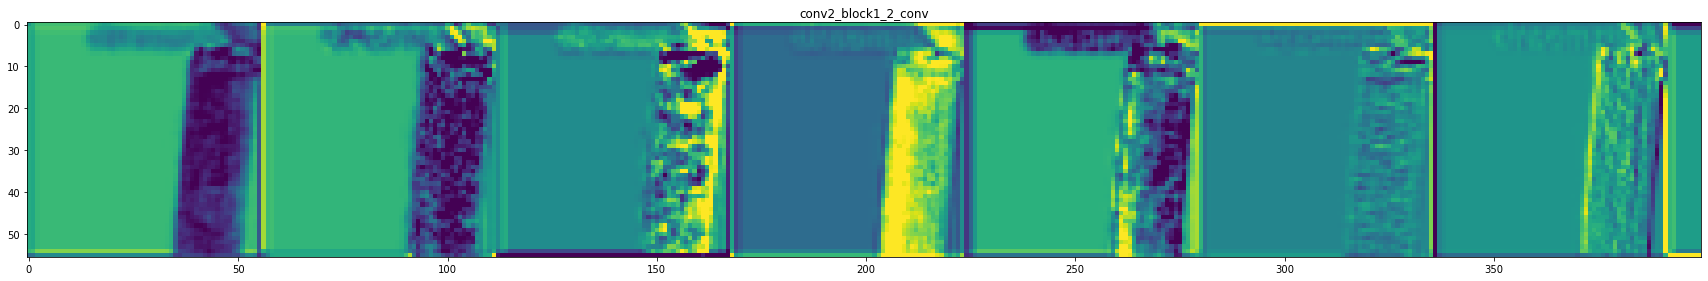

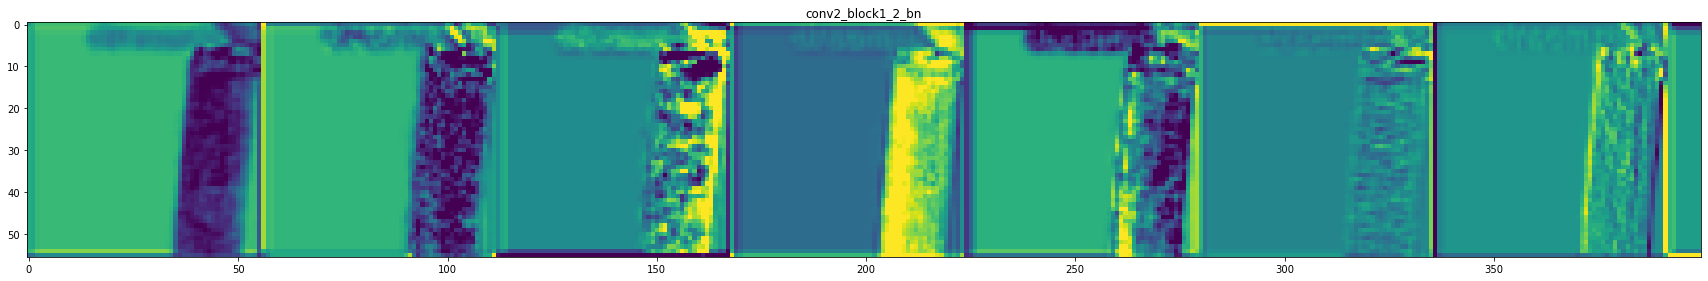

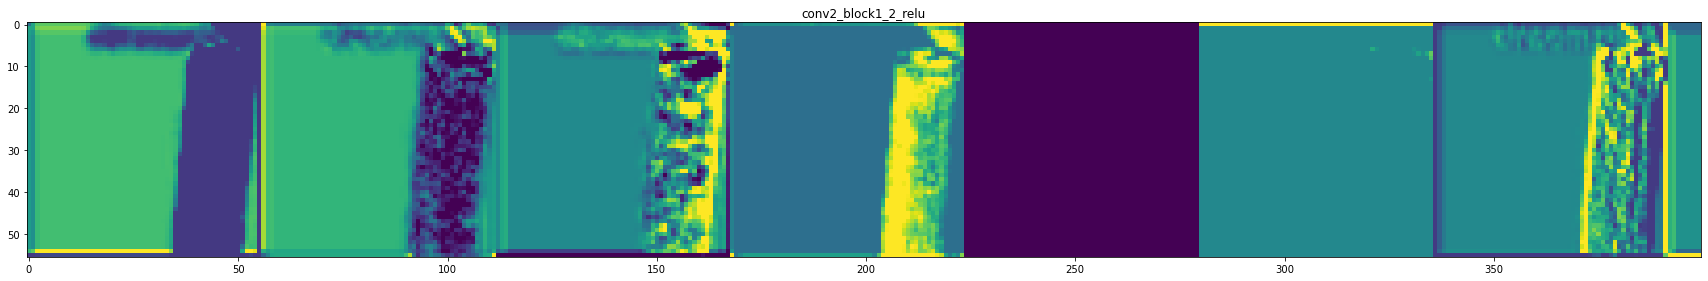

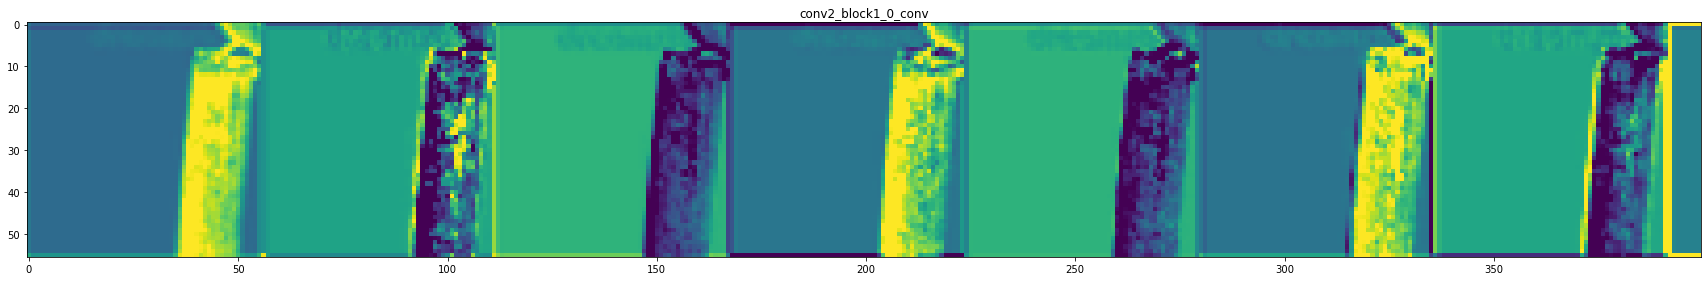

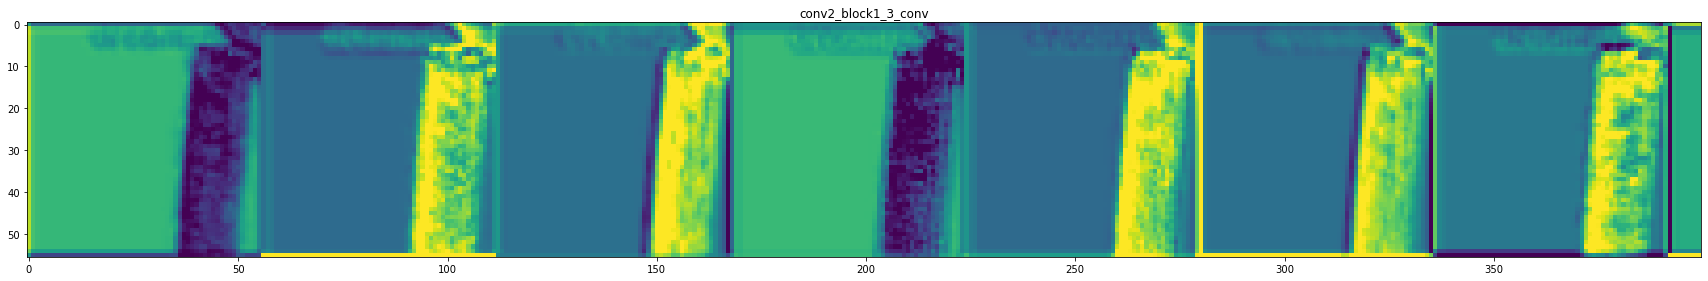

In [ ]:
#export
sample_image = get_sample_image(train_ds)
sample_features = model_sample.predict(sample_image)
for i, name, feature in zip(range(len(model_names)), model_names, sample_features):
    n_features = feature.shape[-1]
    size = feature.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x = feature[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size: (i+1) * size] = x
    scale = 20./ n_features
#     plt.figure(figsize=(scale * n_features, scale))
    plt.figure(figsize=(30, 6))
    plt.title(name)
    plt.grid(False)
#         plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.imshow(display_grid[:, :400])